 ## Plot mass-balance residuals for both glaciers
 #### Ben Pelto May 30, 2021

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import math
from scipy import stats
import seaborn as sns
import pickle
def cm2inch(*tupl):### plots in cm ##frontiers 180 mm for full width, 85 mm half width (1 column) figures
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
import warnings
warnings.filterwarnings("ignore")

fig_path= '/home/pelto/Desktop/ice_flux/figures/'
glacier = ['kokanee', 'conrad', 'illecillewaet', 'nordic', 'zillmer']
Glacier = ['Kokanee', 'Conrad', 'Illecillewaet', 'Nordic', 'Zillmer']

# pal = sns.light_palette((210, 90, 60), input="husl", as_cmap=True)
# pal = sns.diverging_palette(10, 220, sep=80, n=50, as_cmap=True)
pal= sns.cubehelix_palette(light=1, as_cmap=True)

In [4]:
for i in range(5):
    with open(fig_path + glacier[i] +'_residuals.pkl', 'rb') as f:  #_NOfirn
        r = pickle.load(f)
    if i==0:
        ALL=r.copy()
    elif i>0:
        ALL=ALL.append(r,ignore_index=True,)
             
DATA=[];D2=[];z=[]
s= [ALL.opt_bd_fg, ALL.farin_bd_fg,ALL.gpr_bd_fg]
s1=[ALL.opt_bd_fr, ALL.farin_bd_fr,ALL.gpr_bd_fr]
for i in range(3):
    DATA.extend(s[i])
    D2.extend(s1[i])
    z.extend(ALL.zrel)
    
DF = pd.DataFrame(list(zip(DATA,D2,z)),   columns=['all_data','all_frac','zrel'])
DF.dropna(subset=['all_data'],inplace=True)

DF.all_frac[np.abs(DF.all_frac)>2.0]=np.nan; DF_F = DF.copy()
DF_F.dropna(subset=['all_frac'],inplace=True) ## dropping massive percent outliers

# DF.all_frac[np.abs(DF.all_frac)>4]=np.nan;DF.dropna(subset=['all_frac'],inplace=True)
print(len(DF))
# DF.all_data[(DF.all_frac<2.)&(DF.all_frac>2.)]=np.nan;DF.dropna(subset=['all_data'],inplace=True)
print(len(DF))

294
294


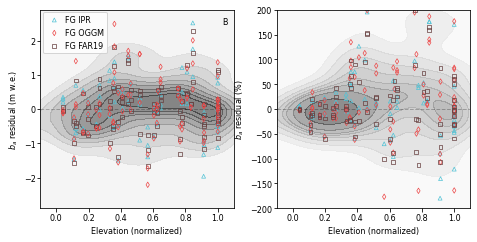

In [5]:
####### create residuals plot ##########

font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
mfc='none'; mew=1.25; elw=0.5
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.';pylab.rcParams['ytick.major.pad']='1.'


s=15; a=1; lw=0.7;
fig, ax = plt.subplots(1,2, figsize=(cm2inch(16.5, 8))) ##mass conservation plot

DF_F.all_frac=DF_F.all_frac*100;
# cb_ax = fig.add_axes([0.1, 0.8, 0.88, 0.02])
cbar_kws={'label':'Kernel density'} ## ,'ticks_position':'right' rotation':'90',, ticks=np.arange(0,90,20),

kde1=sns.kdeplot(DF_F.zrel, DF_F.all_frac, cmap='gray_r', shade=True, cbar=False, cbar_kws=cbar_kws, shade_lowest=True,ax=ax[1],alpha=0.5,zorder=0)#cbar_ax=cb_ax
kde2= sns.kdeplot(DF.zrel, DF.all_data, cmap='gray_r', cbar=False,cbar_kws=cbar_kws, shade=True, shade_lowest=True,ax=ax[0],alpha=0.5,zorder=0)


# c=['k', '#e08214','#542788']  ## black, orange, purple
c = ['k', '#51c2d5','#663f3f','#ec4646']
sym = ['o', '^', 's', 'd']
for i in range(5):
    with open(fig_path + glacier[i] +'_residuals.pkl', 'rb') as f: #_NOfirn
        R = pickle.load(f)
        if i ==0:
            r = R.copy()
        else:
            r =  pd.concat([r, R], axis=0)
r.gpr_bd_fr=r.gpr_bd_fr*100;r.farin_bd_fr=r.farin_bd_fr*100;r.opt_bd_fr=r.opt_bd_fr*100

#     r['gpr_fr']=r.gpr_bdiff/np.abs(r.obs_bin_all);r['far_fr']=r.farin_bdiff/np.abs(r.obs_bin_all);
#     r['opt_fr']=r.opt_bdiff/np.abs(r.obs_bin_all);  

# r.gpr_bd_fr[np.abs(r.gpr_bd_fr)>190]=np.nan; r.farin_bd_fr[np.abs(r.farin_bd_fr)>190]=np.nan;
# r.opt_bd_fr[np.abs(r.opt_bd_fr)>190]=np.nan; 
# r.gpr_bd_fg[np.abs(r.gpr_bd_fg)>3]=np.nan; r.farin_bd_fg[np.abs(r.farin_bd_fg)>3]=np.nan; 
# r.opt_bd_fg[np.abs(r.opt_bd_fg)>3]=np.nan; 
    
ax[1].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=1)
ax[1].set(ylabel=('$b_a$ residual ($\%$)'),xlabel=('Elevation (normalized)'),xlim=(-0.1,1.1))#,ylim=(-2,4))
ax[1].scatter(r.zrel, r.gpr_bd_fr , label= 'FG IPR',color=c[1],marker=sym[1],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[1].scatter(r.zrel, r.opt_bd_fr, label ='FG OGGM' ,color=c[3],marker=sym[3],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[1].scatter(r.zrel, r.farin_bd_fr, label= 'FG FAR19', color=c[2],marker=sym[2],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)



# cbar = fig.colorbar(kde1, cax=cb_ax)
# cbar.set_ticks(np.arange(0, 1.0, 0.1))


ax[0].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=1)
ax[0].set(ylabel=('$b_a$ residual (m w.e.)'),xlabel=('Elevation (normalized)'),xlim=(-0.1,1.1),ylim=(-2.9,2.9))
ax[0].scatter(r.zrel, r.gpr_bd_fg,color=c[1],marker=sym[1],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[0].scatter(r.zrel, r.farin_bd_fg, color=c[2],marker=sym[2],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[0].scatter(r.zrel, r.opt_bd_fg,color=c[3],marker=sym[3],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[1].set_ylim(-200,200)
ax[0].text(0.94, 0.93, 'A', transform=ax[1].transAxes);ax[1].text(0.94, 0.93, 'B', transform=ax[0].transAxes);
leg = ax[1].legend(ncol = 1, bbox_to_anchor=[-1.225,1.01],loc='upper left', handletextpad=0.3,columnspacing=0.9)
# plt.tight_layout()
fig.subplots_adjust(bottom=0.105, top=0.98, hspace=0.1, left=0.07, right=0.99, wspace=0.22)
plt.savefig(fig_path + 'MB_residuals_5glaciers.pdf',dpi=300) #_NOfirn

In [ ]:
#np.nanmedian(DF.all_data),np.nanstd(DF.all_data)

# np.mean(DF.all_data[DF.zrel>0.7])

# np.mean(DF.all_data[DF.zrel<0.5])

# DF.all_frac[np.abs(DF.all_frac)>2.0]=np.nan; DF_F = DF.copy()
# DF_F.dropna(subset=['all_frac'],inplace=True) ## dropping massive percent outliers
# len(DF_F)-len(DF)

# DF[np.isnan(DF.all_frac)].zrel.median()


# DF.all_data[(DF.zrel>0.2)&(DF.zrel<0.6)].mean()

# np.abs(DF.all_data)[(DF.zrel>0.3)&(DF.zrel<0.8)].std()

# DF.all_data[(DF.zrel>0.8)].mean(),DF.all_data[(DF.zrel<0.8)].std()

# DF.all_data[(DF.zrel<0.3)].mean(),DF.all_data[(DF.zrel<0.3)].std()